In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil.relativedelta import relativedelta

In [100]:
df_clientes = pd.read_excel('../dataset/caso_estudo.xlsx', sheet_name='clientes')
df_lojas = pd.read_excel('../dataset/caso_estudo.xlsx', sheet_name='lojas')
df_produtos = pd.read_excel('../dataset/caso_estudo.xlsx', sheet_name='produtos')
df_vendas = pd.read_excel('../dataset/caso_estudo.xlsx', sheet_name='vendas')
df_pagamentos = pd.read_excel('../dataset/caso_estudo.xlsx', sheet_name='pagamentos')

# Analise preliminar

### df_clientes

In [101]:
df_clientes.sample(5)

,id,nome,sexo,dt_nasc
492,493,Ryan Pereira,M,2/8/1950
227,228,Kauê Correia,M,4/4/1981
261,262,Bianca Oliveira,F,7/6/1948
742,743,Gabrielly Barros,F,4/6/1946
626,627,Sophia Ribeiro,F,2/23/1970


In [102]:
df_clientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [103]:
# Identificando as linhas com algum dado nulo
df_clientes[df_clientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [104]:
df_clientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

### df_lojas

In [105]:
df_lojas

,id,cidade
0,1,São Paulo
1,2,Rio de Janeiro
2,3,Curitiba
3,4,Belo Horizonte
4,5,Santa Catarina
5,6,Recife
6,7,Salvador
7,8,Brasília
8,9,Palmas
9,10,Vitória


### df_produtos

In [106]:
df_produtos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


In [107]:
# Visualização por boxplot, excluindo o outlier 'xxx-231a'
df_produtos[df_produtos.valor < 3000000].boxplot(column=['valor'])

<Axes: >

In [108]:
# Há vendas do produto xxx-231a?
df_vendas[df_vendas.id_produto == 10].count()

id            182
id_cliente    182
id_loja       182
id_produto    182
dt_venda      182
dtype: int64

### df_vendas

In [109]:
df_vendas.describe()

,id,id_cliente,id_loja,id_produto,dt_venda
count,3000.000000,3000.000000,3000.000000,3000.000000,3000
mean,1500.500000,500.763667,4.538333,4.435000,2019-05-17 17:48:28.799999744
min,1.000000,1.000000,1.000000,1.000000,2018-01-04 00:00:00
25%,750.750000,254.750000,2.000000,3.000000,2018-09-09 00:00:00
50%,1500.500000,503.500000,4.000000,3.000000,2019-05-20 00:00:00
75%,2250.250000,742.000000,7.000000,6.000000,2020-01-29 06:00:00
max,3000.000000,1000.000000,10.000000,10.000000,2020-09-27 00:00:00
std,866.169729,285.322282,2.922221,2.511018,NaN


### df_pagamento

In [110]:
df_pagamentos.isnull().sum()

id          0
id_venda    0
dt_pgto     0
dtype: int64

In [111]:
df_pagamentos.describe()

,id,id_venda,dt_pgto
count,2072.000000,2072.000000,2072
mean,1036.500000,1491.731660,2019-06-06 05:37:45.637065472
min,1.000000,1.000000,2018-01-10 00:00:00
25%,518.750000,746.250000,2018-10-01 12:00:00
50%,1036.500000,1501.500000,2019-06-10 00:00:00
75%,1554.250000,2220.500000,2020-02-08 00:00:00
max,2072.000000,2997.000000,2020-11-03 00:00:00
std,598.279199,864.865583,NaN


# Data Cleanning

### Dados nulos

In [112]:
df_vendas[df_vendas.id_cliente == 264]

,id,id_cliente,id_loja,id_produto,dt_venda
229,230,264,2,3,2018-03-28
562,563,264,5,3,2018-07-07
1438,1439,264,3,3,2019-04-29
2021,2022,264,6,3,2019-11-08
2877,2878,264,10,3,2020-08-14


In [113]:
df_clientes.loc[df_clientes.nome.isnull(), 'nome'] = 'Sem nome'
df_clientes.loc[df_clientes.sexo.isnull(), 'sexo'] = 'O'
df_clientes.loc[df_clientes.dt_nasc.isnull(), 'dt_nasc'] = '1/1/2020'

In [114]:
df_clientes.loc[[269, 287], :]

,id,nome,sexo,dt_nasc
269,270,Sem nome,M,1/1/2020
287,288,Victor Ribeiro,O,12/17/1974


### Outliers

In [115]:
df_produtos.loc[9, 'valor'] = df_produtos.valor[9]/10000
df_produtos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


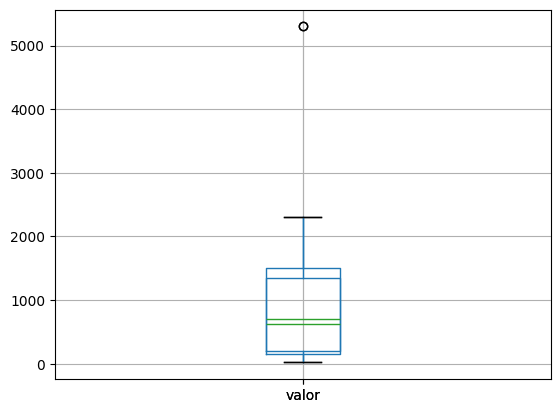

In [116]:
df_produtos.boxplot(column=['valor'])
plt.show()

### Consistência

In [117]:
# Verificando se alguma venda não possui cliente
df_vendas[~df_vendas.id_cliente.isin(df_clientes.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [118]:
# Verificando se alguma venda não está no df_lojas
df_vendas[~df_vendas.id_loja.isin(df_lojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [119]:
# Verificando se algum id_produto não está no df_produtos
df_vendas[~df_vendas.id_produto.isin(df_produtos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [120]:
# Pagamento sem id_venda
df_pagamentos[~df_pagamentos.id_venda.isin(df_vendas.id)]

,id,id_venda,dt_pgto


In [121]:
# Verificando quais vendas não geraram pagamentos
df_vendas[~df_vendas.id.isin(df_pagamentos.id_venda)].count()

id            928
id_cliente    928
id_loja       928
id_produto    928
dt_venda      928
dtype: int64

### Dados duplicados

In [122]:
df_clientes[df_clientes.nome.duplicated()]

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [123]:
# Verificando se existe alguma linha identica, excluindo o id
df_clientes.drop('id', axis=1).duplicated().sum()

0

In [124]:
df_produtos.produto.duplicated().sum()

0

In [125]:
df_lojas.cidade.duplicated().sum()

0

In [126]:
# Pode ser indicativo de um dado duplicado ou que uma pessoa fez duas compras iguais no mesmo dia
df_vendas[df_vendas.drop('id', axis=1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


In [127]:
df_pagamentos.drop('id', axis=1).duplicated().sum()

0

### Formato de dados

In [128]:
# Convertendo o formato da coluna data
df_clientes.dt_nasc = pd.to_datetime(df_clientes.dt_nasc, format='%m/%d/%Y')
df_clientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


### Indexes

In [129]:
df_clientes = df_clientes.set_index('id')
df_clientes

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06
...,...,...,...
996,Ágatha Ribeiro,F,1946-02-08
997,Laura Oliveira,F,1979-06-15
998,Lara Oliveira,F,1946-03-15


In [130]:
df_lojas = df_lojas.set_index('id')
df_produtos = df_produtos.set_index('id')
df_vendas = df_vendas.set_index('id')
df_pagamentos = df_pagamentos.set_index('id')

### Data Fusion

In [131]:
df = df_vendas.join(df_clientes.add_prefix('cliente_'), on='id_cliente')
df = df.join(df_lojas.add_prefix('loja_'), on='id_loja')
df = df.join(df_produtos.add_prefix('produto_'), on='id_produto')

In [132]:
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor
id,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0


In [133]:
df = df.join(df_pagamentos.set_index('id_venda'))
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23


In [134]:
df.isnull().sum()

id_cliente           0
id_loja              0
id_produto           0
dt_venda             0
cliente_nome         0
cliente_sexo         0
cliente_dt_nasc      0
loja_cidade          0
produto_produto      0
produto_valor        0
dt_pgto            928
dtype: int64

### Feature Engeneering

In [135]:
# Criar coluna de pagamento
df['pg'] = 1
df.loc[df.dt_pgto.isnull(), 'pg'] = 0
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg
id,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1


In [136]:
# Identificando o tempo de pagamento
df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg
id,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0


In [137]:
# Identificando a idade dos clientes
df['cliente_idade'] = df['cliente_dt_nasc'].apply(lambda x: relativedelta(pd.to_datetime('today'), x).years)
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,73
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,51
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,61
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,81
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,82


In [138]:
# Salvando uma cópia do csv com todos os tratamentos 
# df.to_csv('df.csv')

## Análise de dados

### Lojas e Produtos que mais vendem

In [139]:
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
graf_dados

loja_cidade
Rio de Janeiro    1087
Salvador           234
Vitória            231
Brasília           223
Belo Horizonte     221
Recife             211
São Paulo          207
Palmas             202
Curitiba           193
Santa Catarina     191
Name: produto_valor, dtype: int64

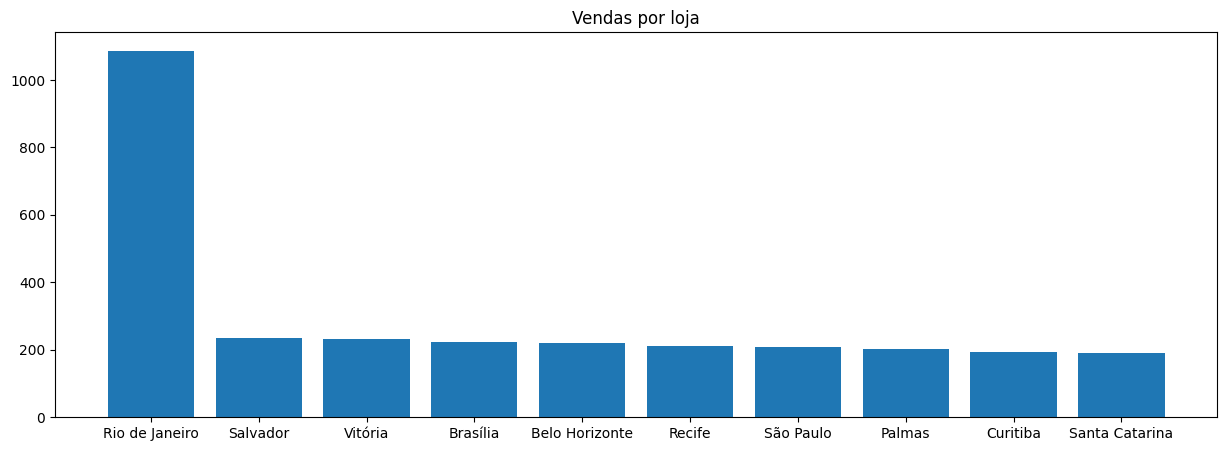

In [140]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por loja')
plt.show()

### Produtos que mais vendem

In [141]:
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
graf_dados.head()

produto_produto
laptop básico    1395
teclado           204
impressora        191
monitor           187
xxx-231a          182
Name: produto_valor, dtype: int64

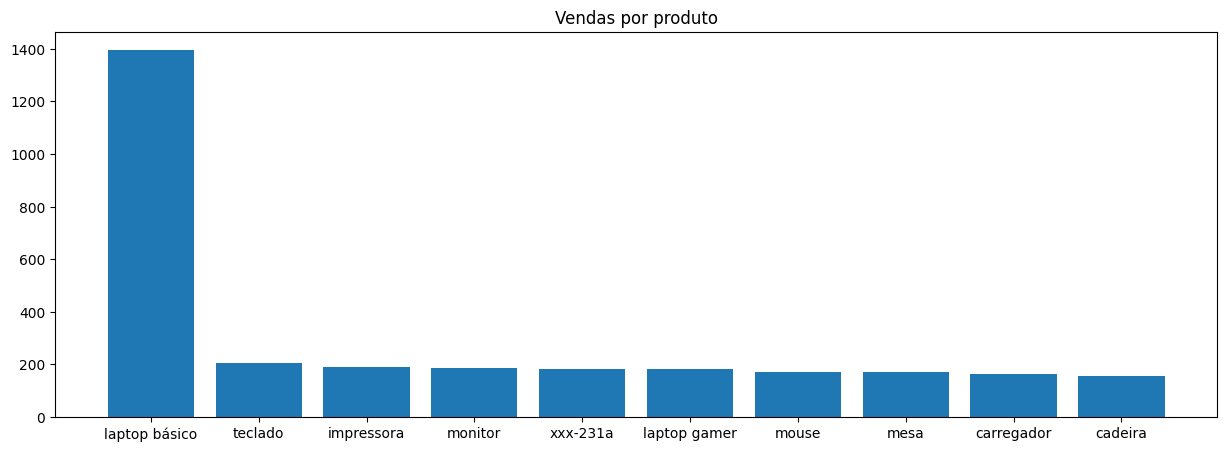

In [142]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por produto')
plt.show()

### Receita por loja

In [143]:
graf_dados = df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending=False)
graf_dados

loja_cidade
Rio de Janeiro    1.797907e+06
Brasília          3.779836e+05
Belo Horizonte    3.757225e+05
Salvador          3.752382e+05
Vitória           3.655850e+05
São Paulo         3.407579e+05
Recife            3.329236e+05
Palmas            3.168370e+05
Santa Catarina    3.133314e+05
Curitiba          3.032404e+05
Name: produto_valor, dtype: float64

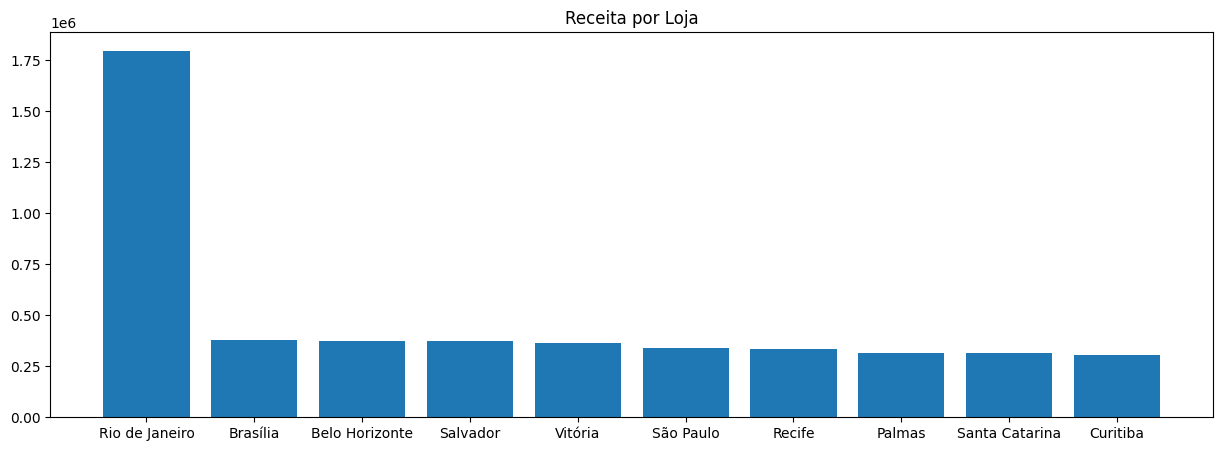

In [144]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por Loja')
plt.show()


In [145]:
print('O maior valor é %i, sendo %.2f vezes a média dos demais, que é %i' % (graf_dados.max(), graf_dados.max()/graf_dados[graf_dados!=graf_dados.max()].mean(), graf_dados[graf_dados!=graf_dados.max()].mean()))

O maior valor é 1797906, sendo 5.22 vezes a média dos demais, que é 344624


### Receita por produto

In [146]:
df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
graf_dados

loja_cidade
Rio de Janeiro    1.797907e+06
Brasília          3.779836e+05
Belo Horizonte    3.757225e+05
Salvador          3.752382e+05
Vitória           3.655850e+05
São Paulo         3.407579e+05
Recife            3.329236e+05
Palmas            3.168370e+05
Santa Catarina    3.133314e+05
Curitiba          3.032404e+05
Name: produto_valor, dtype: float64

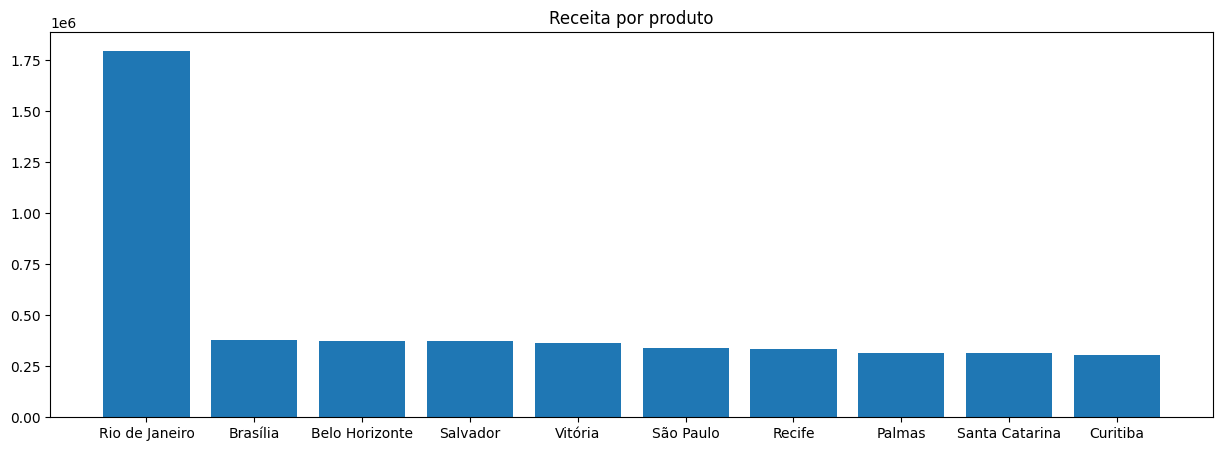

In [147]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por produto')
plt.show()

### Subplots

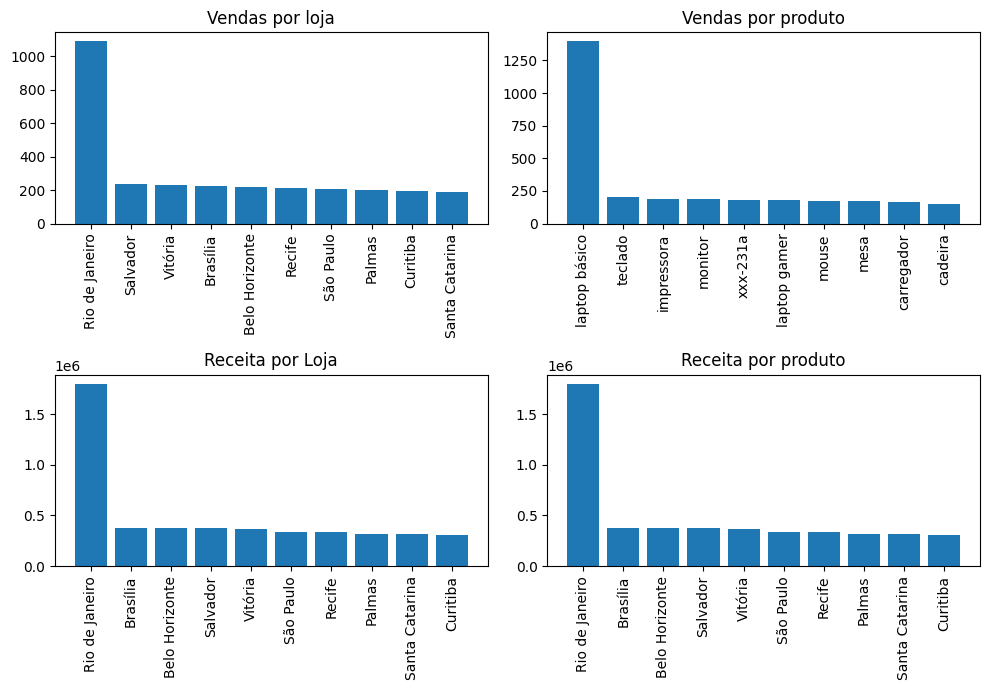

In [152]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Vendas por loja')

plt.subplot(2,2,2)
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Vendas por produto')

plt.subplot(2,2,3)
graf_dados = df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Receita por Loja')

plt.subplot(2,2,4)
df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Receita por produto')

plt.tight_layout()
plt.show()